In [6]:

import os
os.makedirs("~/.kaggle", exist_ok=True)
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

!unzip /content/daily-climate-time-series-data.zip

#link to dataset " https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data"

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
daily-climate-time-series-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
# Load the dataset (make sure you replace this with the actual path to your CSV file)
data = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
print(data.size)
# Step 2: Preprocess data

# We'll focus on the 'meantemp' column (daily mean temperature)
temperature_data = data['meantemp'].dropna()
print(temperature_data.size)
data.columns



7310
1462


Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

,count
meantemp,
"(6.0, 8.0]",4
"(8.0, 10.0]",13
"(10.0, 12.0]",34
"(12.0, 14.0]",80
"(14.0, 16.0]",80
"(16.0, 18.0]",107
"(18.0, 20.0]",96
"(20.0, 22.0]",60
"(22.0, 24.0]",94


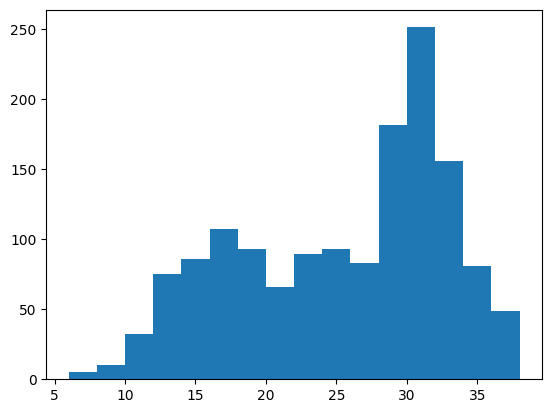

In [8]:
# Define temperature bins
bins = np.arange(temperature_data.min(), temperature_data.max() + 1, 2)  # bins of 2°C

# plot bins data
plt.hist(temperature_data, bins=bins)

binned_data = pd.cut(temperature_data, bins=bins)

# Calculate the frequency of each bin
bin_counts = binned_data.value_counts(sort=False)
bin_counts




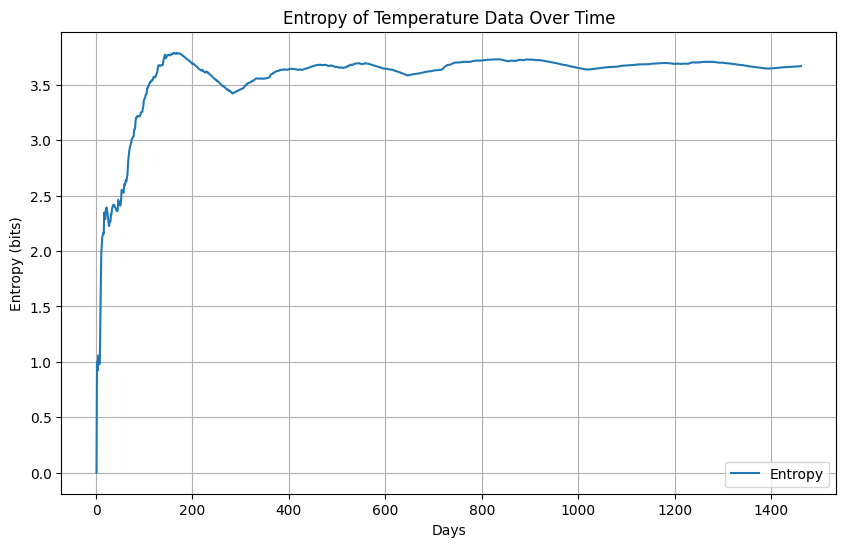

In [9]:
#Calculate probabilities of each bin
probabilities = bin_counts / len(temperature_data)



# Step 5: Define a function to calculate entropy
def calculate_entropy(probabilities):
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

# Initialize variables to store results over time
entropy_values = []
prob_over_time = []

# Step 6: Iterate over data and compute entropy at each time step
for i in range(1, len(temperature_data) + 1):
    temp_slice = temperature_data[:i]
    binned_slice = pd.cut(temp_slice, bins=bins)
    bin_counts_slice = binned_slice.value_counts(sort=False)

    # Calculate probabilities for the slice
    probabilities_slice = bin_counts_slice / len(temp_slice)

    # Store probability distribution
    prob_over_time.append(probabilities_slice)

    # Calculate entropy for the slice
    entropy = calculate_entropy(probabilities_slice)
    entropy_values.append(entropy)

# Step 7: Plot entropy over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(entropy_values) + 1), entropy_values, label="Entropy")
plt.title('Entropy of Temperature Data Over Time')
plt.xlabel('Days')
plt.ylabel('Entropy (bits)')
plt.legend()
plt.grid(True)
plt.show()